# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

# 02. Import Data

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.5.2'

#### Observations: matplotlib is up-to-date

In [3]:
# Display charts in notebook
%matplotlib inline

In [4]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Achievement 6'

In [5]:
# Import trips_merged_cleaned.csv
df_trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_merged_cleaned.csv'), index_col = False)

# 03. Explore Data

In [6]:
# View first 5 rows for df_trips
df_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [7]:
# Check datatypes
df_trips.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

# 04. Wrangling Procedures

In [8]:
# Convert 'starttime' and 'stoptime' columns to datetime instead of object
df_trips['starttime'] = pd.to_datetime(df_trips['starttime'])
df_trips['stoptime'] = pd.to_datetime(df_trips['stoptime'])

In [9]:
# Ensure datatype successfully changed
df_trips.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

#### Obserations: Data types for 'starttime' and 'stoptime' successfully changed from object to datetime.

In [10]:
# Extract day, month, and year from 'starttime' and 'stoptime' columns
df_trips['day_of_month_starttime'] = df_trips['starttime'].dt.day
df_trips['month_starttime'] = df_trips['starttime'].dt.month
df_trips['year_starttime'] = df_trips['starttime'].dt.year

df_trips['day_of_month_stoptime'] = df_trips['stoptime'].dt.day
df_trips['month_stoptime'] = df_trips['stoptime'].dt.month
df_trips['year_stoptime'] = df_trips['stoptime'].dt.year

In [11]:
# Create columns showing weekday name and month name for 'starttime' and 'stoptime' columns
df_trips['weekday_starttime'] = df_trips['starttime'].dt.day_name()
df_trips['weekday_stoptime'] = df_trips['stoptime'].dt.day_name()

df_trips['month_name_starttime'] = df_trips['starttime'].dt.month_name()
df_trips['month_name_stoptime'] = df_trips['stoptime'].dt.month_name()

In [12]:
# Extract hour of day for 'starttime' and 'stoptime' columns
df_trips['hour_starttime'] = df_trips['starttime'].dt.hour
df_trips['hour_stoptime'] = df_trips['stoptime'].dt.hour

In [13]:
# Create 'customer_age' column
df_trips['customer_age'] = df_trips['year_starttime'] - df_trips['birth year']

In [14]:
# Create column showing starttime counts
df_trips['starttime_counts'] = df_trips.groupby(['start station name'])['starttime'].transform('count')

In [15]:
# Create minute and hour column for 'tripduration'
df_trips['tripduration_minutes'] = (df_trips['tripduration'] / 60)
df_trips['tripduration_hours'] = (df_trips['tripduration'] / 3600)

In [16]:
# Ensure all new columns were successfully created
df_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,weekday_starttime,weekday_stoptime,month_name_starttime,month_name_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,Wednesday,Wednesday,January,January,0,0,36,25629,3.766667,0.062778
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,Wednesday,Wednesday,January,January,0,0,31,25629,6.283333,0.104722
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,Wednesday,Wednesday,January,January,0,0,31,25629,4.800000,0.080000
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,...,Wednesday,Wednesday,January,January,0,0,51,15767,7.250000,0.120833
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,Wednesday,Wednesday,January,January,0,0,37,25629,3.850000,0.064167


In [17]:
# Ensure all new columns were successfully created
df_trips.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'day_of_month_starttime', 'month_starttime',
       'year_starttime', 'day_of_month_stoptime', 'month_stoptime',
       'year_stoptime', 'weekday_starttime', 'weekday_stoptime',
       'month_name_starttime', 'month_name_stoptime', 'hour_starttime',
       'hour_stoptime', 'customer_age', 'starttime_counts',
       'tripduration_minutes', 'tripduration_hours'],
      dtype='object')

#### Observations: All new columns were successfully created.

In [18]:
# Replace values with names in 'gender' column
df_trips = df_trips.replace ({'gender':{0: 'unknown', 1:'male', 2:'female' }})

In [19]:
# Ensure values were successfully replaced
df_trips['gender'].head()

0     female
1     female
2       male
3    unknown
4     female
Name: gender, dtype: object

#### Observations: Values in 'gender' column successfully replaced with names

In [20]:
# View statistics for 'tripduration' variable
df_trips['tripduration'].describe()

count    3.798610e+05
mean     1.554135e+03
std      1.770860e+04
min      6.100000e+01
25%      3.220000e+02
50%      6.000000e+02
75%      1.372000e+03
max      3.261756e+06
Name: tripduration, dtype: float64

In [21]:
# View statistics for 'tripduration_hours' variable
df_trips['tripduration_hours'].describe()

count    379861.000000
mean          0.431704
std           4.919056
min           0.016944
25%           0.089444
50%           0.166667
75%           0.381111
max         906.043333
Name: tripduration_hours, dtype: float64

In [22]:
# View statistics for 'tripduration_minutes' variable
df_trips['tripduration_minutes'].describe()

count    379861.000000
mean         25.902255
std         295.143384
min           1.016667
25%           5.366667
50%          10.000000
75%          22.866667
max       54362.600000
Name: tripduration_minutes, dtype: float64

#### Observations: The max value is extremely high, so there are obviously outliers. If a bike is not returned within a 24-hour period, Citi Bike charges a lost/stolen bike fee of 1200 dollars. Because of this policy, it would be reasonable to treat any trip duration above 24 hours as an outlier.  

In [23]:
df_trips.loc[df_trips['tripduration_hours'] > 24] 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,weekday_starttime,weekday_stoptime,month_name_starttime,month_name_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours
3023,132652,2020-01-05 18:49:09.465,2020-01-07 07:40:01.608,3195,Sip Ave,40.730897,-74.063913,3186,Grove St PATH,40.719586,...,Sunday,Tuesday,January,January,18,7,43,15767,2210.866667,36.847778
8772,190093,2020-01-11 15:23:33.906,2020-01-13 20:11:47.317,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,...,Saturday,Monday,January,January,15,20,43,18933,3168.216667,52.803611
9682,150034,2020-01-12 14:30:53.263,2020-01-14 08:11:27.500,3205,JC Medical Center,40.716540,-74.049638,3205,JC Medical Center,40.716540,...,Sunday,Tuesday,January,January,14,8,51,12134,2500.566667,41.676111
14923,152783,2020-01-17 21:44:00.706,2020-01-19 16:10:23.977,3678,Fairmount Ave,40.725726,-74.071959,3195,Sip Ave,40.730897,...,Friday,Sunday,January,January,21,16,27,4080,2546.383333,42.439722
15761,114081,2020-01-20 09:21:09.121,2020-01-21 17:02:30.876,3273,Manila & 1st,40.721651,-74.042884,3192,Liberty Light Rail,40.711242,...,Monday,Tuesday,January,January,9,17,51,6040,1901.350000,31.689167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374222,149953,2021-04-24 19:49:08.580,2021-04-26 13:28:22.423,3185,City Hall,40.717732,-74.043845,3209,Brunswick St,40.724176,...,Saturday,Monday,April,April,19,13,51,10935,2499.216667,41.653611
374223,144485,2021-04-24 19:49:11.838,2021-04-26 11:57:17.480,3185,City Hall,40.717732,-74.043845,3186,Grove St PATH,40.719586,...,Saturday,Monday,April,April,19,11,51,10935,2408.083333,40.134722
374529,330491,2021-04-24 22:50:39.860,2021-04-28 18:38:51.485,3202,Newport PATH,40.727224,-74.033759,4282,Washington St & Barrow St,40.731911,...,Saturday,Wednesday,April,April,22,18,51,14583,5508.183333,91.803056
377070,375841,2021-04-28 00:19:30.078,2021-05-02 08:43:31.196,3483,Montgomery St,40.719420,-74.050990,3185,City Hall,40.717732,...,Wednesday,Sunday,April,May,0,8,51,4508,6264.016667,104.400278


#### Observations: There are 350 records with a trip duration greater than 24 hours. They make up 0.09% of the trip duration values. The outliers will be replaced with the median (0.166667) so that the associated variables may be preserved. 

In [24]:
# Replace outliers with median
df_trips['tripduration'] = np.where(df_trips['tripduration'] > 86400 , 600, df_trips['tripduration'])
df_trips['tripduration_hours'] = np.where(df_trips['tripduration_hours'] > 24 , 0.166667, df_trips['tripduration_hours'])
df_trips['tripduration_minutes'] = np.where(df_trips['tripduration_minutes'] > 1440 , 10, df_trips['tripduration_minutes'])

In [25]:
# Ensure that outliers were replaced with median
df_trips['tripduration_hours'].describe()

count    379861.000000
mean          0.340560
std           0.752472
min           0.016944
25%           0.089444
50%           0.166667
75%           0.379444
max          23.997778
Name: tripduration_hours, dtype: float64

#### Observations: Outliers successfully replaced.

# 05. Explore Relationships

### Correlation Heatmap

In [26]:
# Create subset excluding variables unnecessary for relationship comparison
subset_trips = df_trips[['tripduration', 'start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'customer_age']]

In [27]:
# Create correlation matrix
subset_trips.corr()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,customer_age
tripduration,1.000000,-0.035205,-0.002006,-0.001492,-0.000914,0.024860
start station latitude,-0.035205,1.000000,-0.123848,0.035069,-0.012017,-0.030854
start station longitude,-0.002006,-0.123848,1.000000,-0.007645,0.035879,0.004282
end station latitude,-0.001492,0.035069,-0.007645,1.000000,-0.994954,0.000904
end station longitude,-0.000914,-0.012017,0.035879,-0.994954,1.000000,-0.003107
customer_age,0.024860,-0.030854,0.004282,0.000904,-0.003107,1.000000


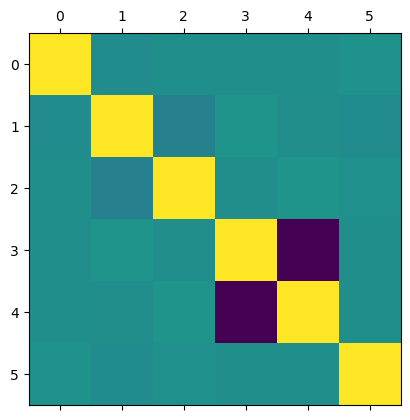

In [28]:
# Create correlation heatmap using matplotlib
plt.matshow(subset_trips.corr())
plt.show()

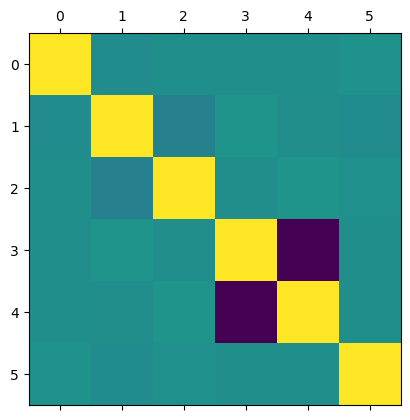

In [29]:
# Save figure
plt.matshow(subset_trips.corr())
plt.savefig("out.png") 

In [30]:
# Directory
cwd = os.getcwd()
cwd

'C:\\Users\\jrper\\OneDrive\\Documents\\Career Foundry Data Analytics Program\\Achievement 6\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

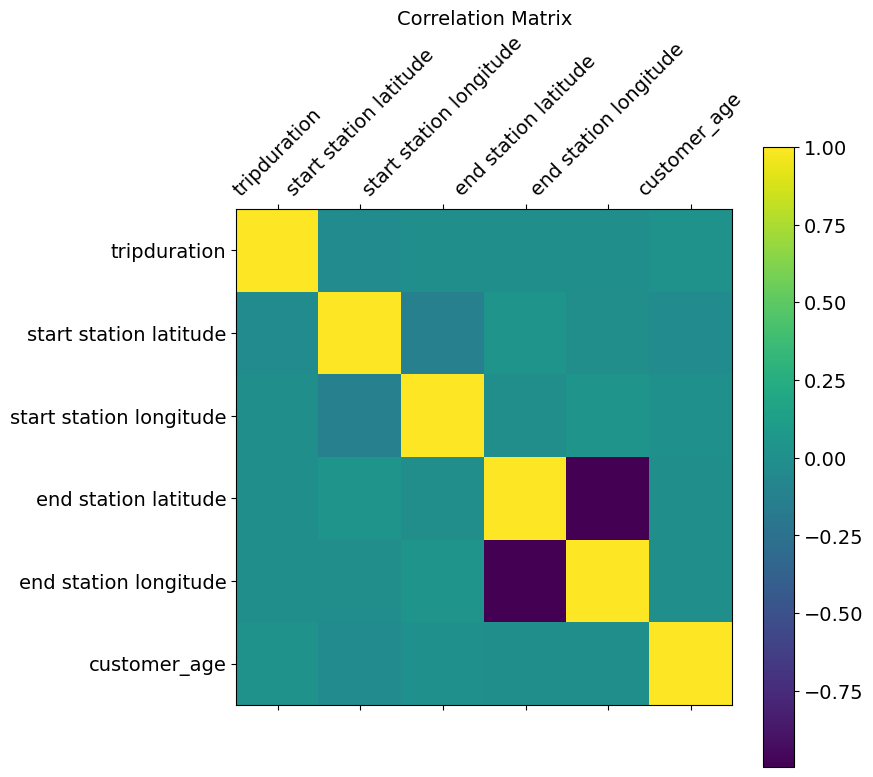

In [31]:
# Format Heatmap

f = plt.figure(figsize=(8, 8)) # Figure Size
plt.matshow(subset_trips.corr(), fignum=f.number) # Type of Plot
plt.xticks(range(subset_trips.shape[1]), subset_trips.columns, fontsize = 14, rotation = 45) # x-axis labels
plt.yticks(range(subset_trips.shape[1]), subset_trips.columns, fontsize = 14) # y-axis labels
cb = plt.colorbar() # add colorbar
cb.ax.tick_params(labelsize = 14) # add font size
plt.title('Correlation Matrix', fontsize = 14) # add title

### Correlation Heatmap using Seaborn

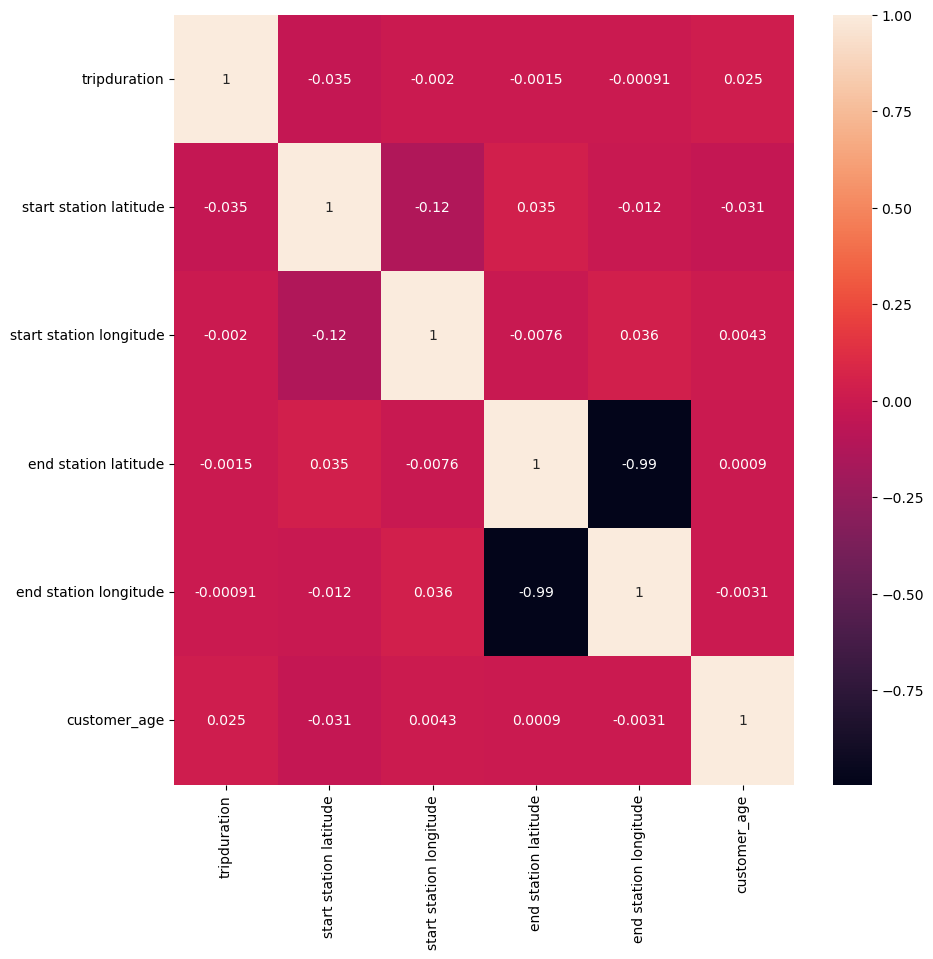

In [32]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr = sns.heatmap(subset_trips.corr(), annot = True, ax = ax) 

#### Observations: The only strong correlation is between end station latitude and end station longitude, which isn't helpful information because they are geographic variables for specific Citi Bike stations.   

### Scatterplot

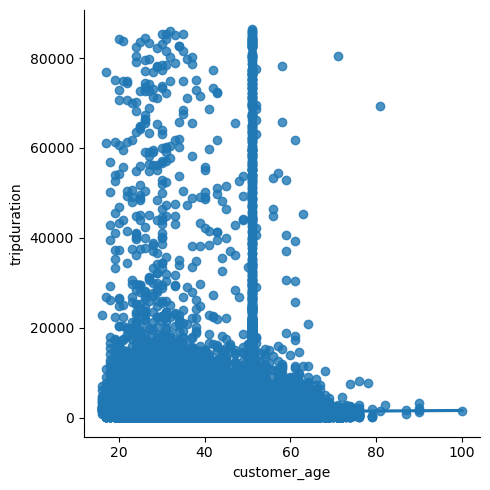

In [33]:
# Create scatterplot for 'customer_age' and 'tripduration' in seaborn
sns.lmplot(x = 'customer_age', y = 'tripduration', data = subset_trips)

#### Observations: The only two quantitative variables in this data set aside from the geographic ones are 'tripduration' and 'customer_age' (birth year). As the heatmap and scatterplot show, there is not a linear relationship between these variables. The scatterplot does show that customers aged 60 and younger take longer trips.

### Pair Plots

In [34]:
# Keep only the variables you want to use in the pair plot
subset2_trips = df_trips[['tripduration', 'customer_age']]

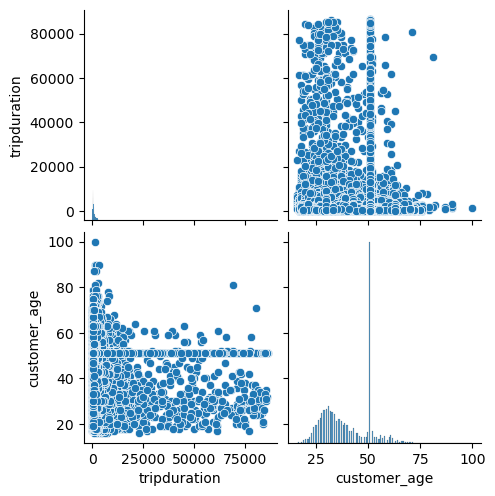

In [35]:
# Create pair plot 
g = sns.pairplot(subset2_trips)

#### Observations: The distribution for 'customer_age' is right-skewed. I would like to look closer to see why there are very high counts for customers around age 51. I would also like to look closer at 'tripduration', and further explore customer profiles using 'customer_age', 'gender', and 'usertype'.

### Categorical Plots

<AxesSubplot:xlabel='tripduration', ylabel='Count'>

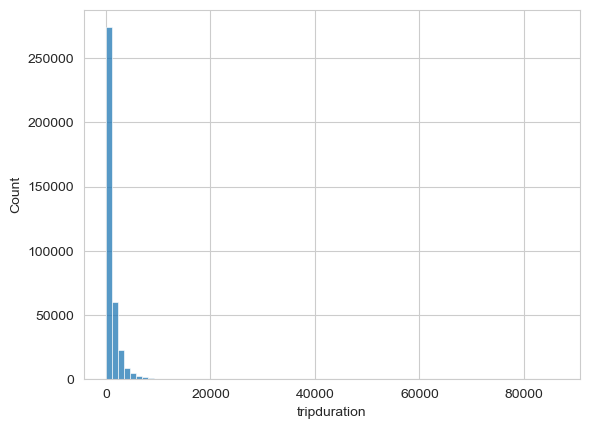

In [36]:
# View distribution for 'tripduration'
sns.set_style("whitegrid")
sns.histplot(df_trips['tripduration'], bins = 75)

#### Observations: Right-skewed histogram. Vast majority of trips are very short.

In [37]:
# Create buckets for 'tripduration' variable
df_trips.loc[df_trips['tripduration'] <= 600, 'tripduration_buckets'] = '10 minutes or less'
df_trips.loc[(df_trips['tripduration'] > 600) & (df_trips['tripduration'] <= 2700), 'tripduration_buckets'] = '11min-45min'
df_trips.loc[df_trips['tripduration'] > 2700, 'tripduration_buckets'] = 'over 45 min'

C:\Users\jrper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tripduration_buckets', ylabel='count'>

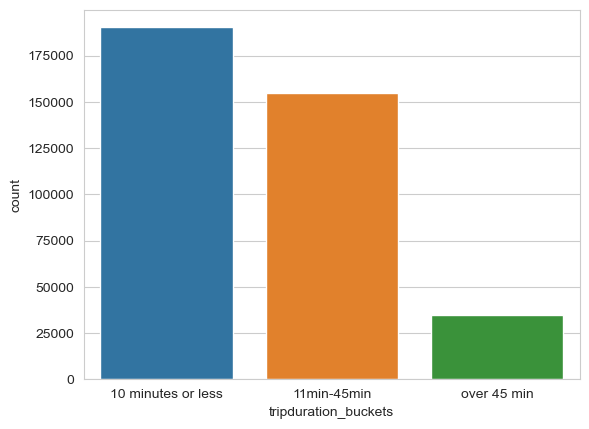

In [38]:
# Create countplot for 'tripduration_buckets'
sns.countplot(df_trips['tripduration_buckets'])

#### Observations: Most trips are 10 minutes or less.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

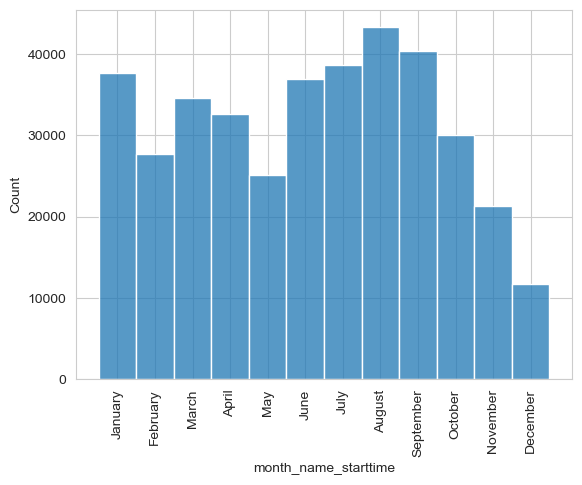

In [39]:
# View distribution of 'month_name_starttime' variable. 
sns.histplot(df_trips['month_name_starttime'])
plt.xticks(rotation = 90)

#### Observations: July, August, and September are busiest months. December is least busy month.

C:\Users\jrper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

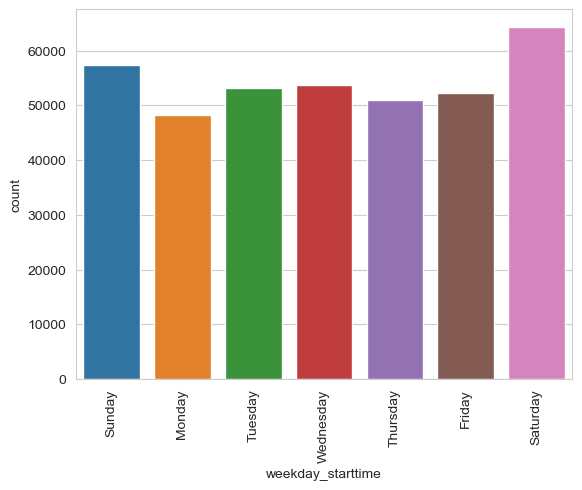

In [40]:
# Create countplot for day of the week
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(df_trips['weekday_starttime'], order = order)
plt.xticks(rotation = 90)

#### Observations: Saturday and Sunday are busiest days of the week. Monday is least busy.

<AxesSubplot:xlabel='hour_starttime', ylabel='Count'>

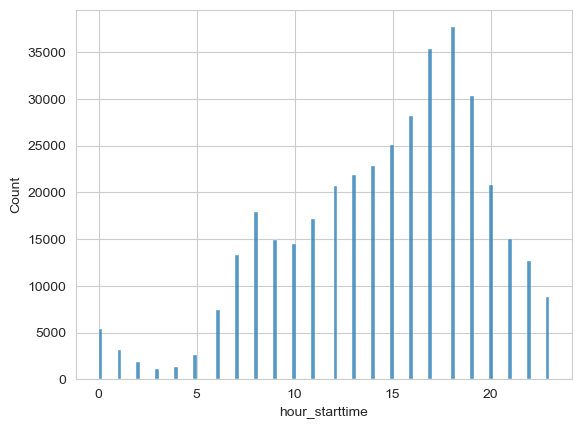

In [41]:
# View distribution for start time hour of day
sns.histplot(df_trips['hour_starttime'])

#### Observations: Most popular start time is 6:00pm

<AxesSubplot:xlabel='hour_stoptime', ylabel='Count'>

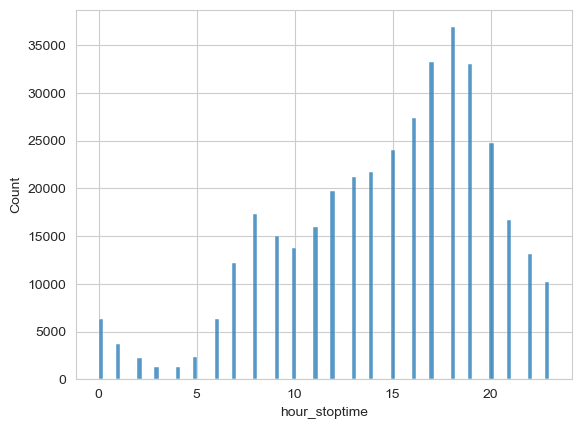

In [42]:
# View distribution for stop time hour of day
sns.histplot(df_trips['hour_stoptime'])

#### Observations: Distribution for hour_stoptime is very similar to hour_starttime. Most popular stop time is 6:00pm.

<AxesSubplot:xlabel='usertype', ylabel='count'>

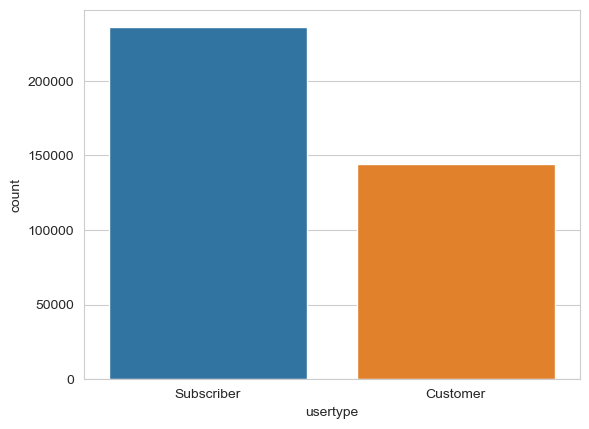

In [43]:
# Create countplot for 'usertype' variable
sns.countplot(x = df_trips['usertype'])

#### Observations: Most Citi Bike users are subscribers.

(array([0, 1]), [Text(0, 0, 'Subscriber'), Text(1, 0, 'Customer')])

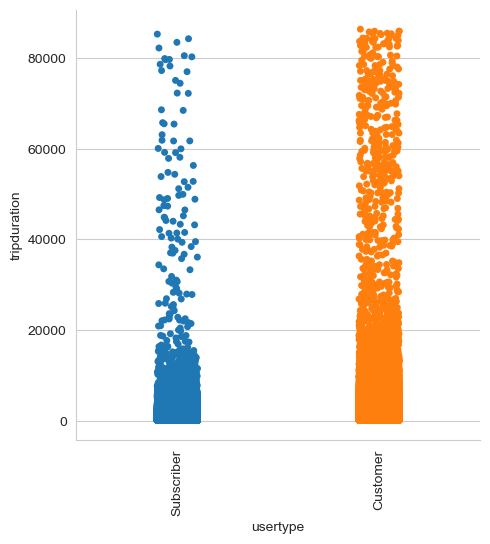

In [44]:
# Create catplot comparing 'usertype' and 'tripduration'
sns.catplot(data=df_trips, x='usertype', y='tripduration')
plt.xticks(rotation = 90)

#### Observations: Customers take more long trips than subscribers.

<AxesSubplot:xlabel='gender', ylabel='count'>

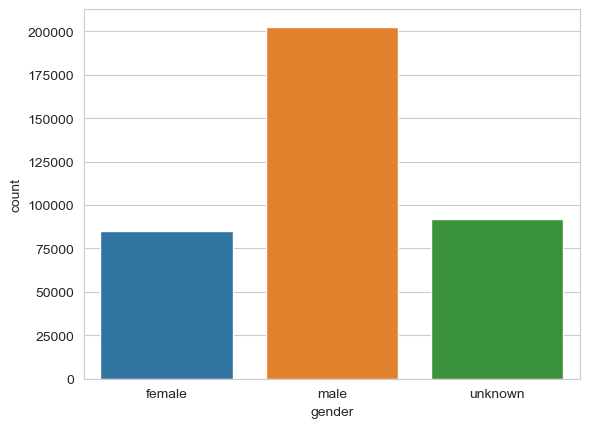

In [45]:
# Create countplot for 'gender' variable
sns.countplot(x = df_trips['gender'])

#### Observations: Males use Citi Bike more than females. 

<AxesSubplot:xlabel='gender', ylabel='tripduration'>

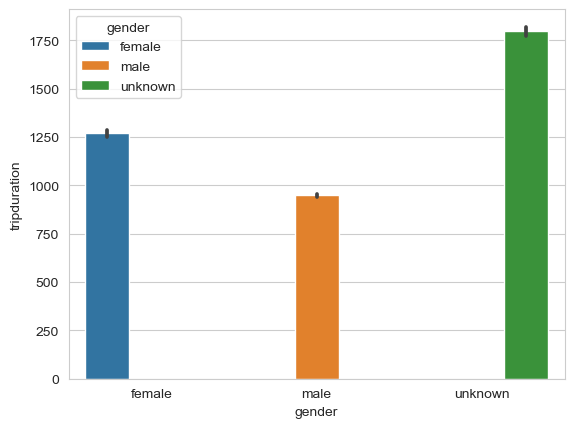

In [46]:
# Create barplot comparing 'gender' and 'tripduration'
sns.barplot(data=df_trips, x="gender", y="tripduration", hue="gender")

#### Observations: Females take longer trips than males.

### Answers to questions and hypotheses

#### 1. Customers aged 60 and younger take longer trips.
#### 2. July, August, and September are the busiest months. December is the least busy month.
#### 3. Saturday and Sunday are the busiest days of the week. Monday is the least busy day of the week.
#### 4. Most popular start time and stop time is 6:00pm.
#### 5. More users are subscribers than customers.
#### 6. Customers take more long trips than subscribers.
#### 7. More users are male than female.
#### 8. Females take longer trips than males.

# 06. Export Data

In [47]:
df_trips.to_csv(os.path.join(path, '02 Data','Prepared Data', 'trips_wrangled_no_outliers2.csv'))